## Netflix Data Preparation and Cleaning for Visualization

In [1]:
# Importing libs
import pandas as pd
import numpy as np
import datetime as dt

In [2]:
netflix_df = pd.read_csv('netflix_titles.csv')

netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Data Preparation 

In [3]:
# Replacing country null values with mode of the country

netflix_df['country'] = netflix_df['country'].fillna(netflix_df['country'].mode()[0])


netflix_df['cast'].replace(np.nan, 'No Data',inplace  = True)
netflix_df['director'].replace(np.nan, 'No Data',inplace  = True)

# Drop the remaing rows if any other column contains nulls

netflix_df.dropna(inplace=True)

# Droping Duplicates

netflix_df.drop_duplicates(inplace= True)

In [4]:
netflix_df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

We can see that there are no null values any more.

In [5]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7770 non-null   object
 1   type          7770 non-null   object
 2   title         7770 non-null   object
 3   director      7770 non-null   object
 4   cast          7770 non-null   object
 5   country       7770 non-null   object
 6   date_added    7770 non-null   object
 7   release_year  7770 non-null   int64 
 8   rating        7770 non-null   object
 9   duration      7770 non-null   object
 10  listed_in     7770 non-null   object
 11  description   7770 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.1+ KB


Change the date format and extract month. This will be used in the visualization to see releases according to the months and years.

In [6]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])

netflix_df['month_added']=netflix_df['date_added'].dt.month
netflix_df['month_name_added']=netflix_df['date_added'].dt.month_name()

netflix_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,month_added,month_name_added
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,8,August
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,12,December
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",12,December


### Exporting to csv file 

In [7]:
netflix_df.to_csv('netflix_cleaned.csv')

This cleaned csv file is used to ingest into tableau desktop for visualization.

In [11]:
from wordcloud import WordCloud
import random
from PIL import Image
import matplotlib.pyplot as plt

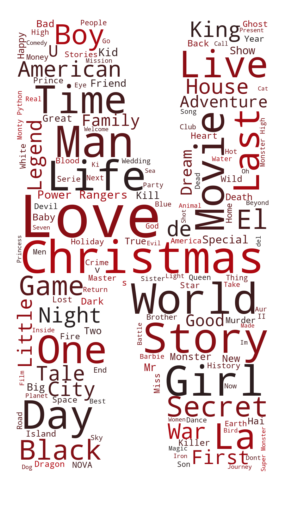

In [21]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['#221f1f', '#b20710'])
text = str(list(netflix_df['title'])).replace(',', '').replace('[', '').replace("'", '').replace(']', '').replace('.', '')
mask = np.array(Image.open('./n.png'))
wordcloud = WordCloud(background_color = 'white', width = 1000, height = 500,colormap=cmap, max_words = 150, mask = mask).generate(text)

plt.figure( figsize=(7,7))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()